In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/sflan/Dropbox (Brown)/Healthfully/Clean Data/weather_flu_google_9.csv')

In [8]:
df['cases'] = df['total.specimens'] * df['percent.positive'] / 10000
df = df[['cases', 'absolute_humidity', 'week', 'year']]

In [14]:
summary_stats = df.describe()
summary_stats

,cases,absolute_humidity,week,year
count,418.000000,418.000000,418.000000,418.000000
mean,0.376643,7.902509,26.595694,2014.258373
std,0.718115,4.890266,15.060603,2.336293
min,0.000000,0.200166,1.000000,2010.000000
25%,0.000000,3.527881,14.000000,2012.000000
50%,0.030100,6.737366,27.000000,2014.000000
75%,0.477471,12.020473,40.000000,2016.000000
max,5.349486,19.955150,53.000000,2018.000000


In [42]:
# df['zscore_cases'] = (df['cases'] - summary_stats.cases.mean())/summary_stats.cases.std()
df['zscore_cases'] = (df['cases'] - 0.376643)/0.718115
# summary_stats.cases.mean()
df['zscore_humidity'] = -1*(df['absolute_humidity'] - 7.902509)/4.890266

C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sflan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [43]:
df.head()

,cases,absolute_humidity,week,year,zscore_cases,zscore_humidity
0,0.000000,9.417646,40,2010,-0.524488,-0.309827
1,0.009975,7.021040,41,2010,-0.510598,0.180250
2,0.010011,5.831757,42,2010,-0.510548,0.423444
3,0.020020,8.617508,43,2010,-0.496610,-0.146209
4,0.000000,5.231198,44,2010,-0.524488,0.546251


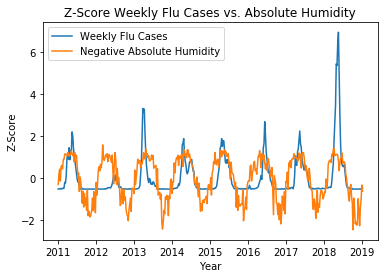

In [45]:
plt.plot(df['zscore_cases'])
plt.plot(df['zscore_humidity'])
plt.title('Z-Score Weekly Flu Cases vs. Absolute Humidity')
plt.xlabel('Year')
plt.ylabel('Z-Score')
tick_locs = [52*i for i in range(9)]
x_ticks = [str(2011 + i) for i in range(9)]
plt.xticks(tick_locs, x_ticks)
plt.legend(['Weekly Flu Cases', 'Negative Absolute Humidity'])
plt.savefig('absolute_humidity.png')